<a href="https://colab.research.google.com/github/davidmorasalazar/FUNDAMENTALS-OF-MICROECONOMETRICS-ANALYZING-DATA-WITH-LIMITED-DEPENDENT-VARIABLE-AND-DURATION-MODELS/blob/main/Tarea_2_Microeconometr%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

#**Tarea #2: Máxima verosimilitud, Truncamiento y Censura**

EC-4300 Microeconometría

Estudiantes: B75115 y B76137

#**Primera parte:** Máxima verosimilitud

1. Cargue la base y cree las variables necesarias para empezar a trabajar.

1.a Se instalan los paquetes necesarios.

In [ ]:
%%R
install.packages(c("readxl","dplyr","ggplot2", "plotly","tidyr","scales","aod"))

UsageError: Cell magic `%%R` not found.


1.b Se cargan los paquetes necesarios.

In [ ]:
%%R
library(readxl)
library(dplyr)
library(ggplot2)
library(plotly)
library(tidyr)
library(scales)
library(aod)

1.c Se carga la base de datos y se crean las variables necesarias.

In [ ]:
%%R
Cobb_Douglas<- read_excel("C:/Users/David Mora Salazar/Documents/ECONOMÍA UNIVERSIDAD DE COSTA RICA/Microeconometría/Tarea 2/Cobb Douglas.xlsx" ,sheet = "Hoja4")
Cobb_Douglas<-as.matrix(Cobb_Douglas[,2:4]) # Convertimos a matriz y quitamos la primera columna, que tiene un contador, 
Insumo_1<-Cobb_Douglas[,1]  # Insumo_1 está en la primera columna
Insumo_2<-Cobb_Douglas[,2]  # Insumo_2 en la segunda
Producto<-Cobb_Douglas[,3]  # Producto en la tercera 


2. Calcule la función de verosimilitud y optimícela. ¿Por qué se está utilizando una función de verosimilitud?,¿Cuál es el propósito de encontrar la máxima verosimilitud de la función? ¿Cuál es el valor de máxima verosimilitud?

2.a Se crea la función de verosimilitud.

In [ ]:
mv_fprod<-function(alfa,Z1,Z2,Q) {
  n<-length(Z1)  #NÃºmero de observaciones
  e<-Q-alfa[1]*(Z1^alfa[2])*(Z2^alfa[3])   # Forma funcional de los residuos
  logl<- -0.5*n*log(2*pi)-0.5*n*log(alfa[4])-((t(e)%*%e)/(2*alfa[4])) # FunciÃ³n de verosimilitud normal evaluada en residuos
  return(-logl)  # FunciÃ³n da el negativo de la verosimilitud. Necesario para funciÃ³n de optimizaciÃ³n "optim"
}

2.b Se optmiza la función de verosimilitud.

In [ ]:
resultado<-optim(c(1,0.5,0.5,0.01),mv_fprod,method="BFGS",hessian=T,Z1=Insumo_1,Z2=Insumo_2,Q=Producto)

2.c Se muestra el hessiano asociado y se averigua el valor de máxima verosimilitud.

In [ ]:
resultado  #Muestra todos los resultados del hessiano
resultado$value  # Valor resultante para la máxima verosimilitud
paste("La maxima verosimilitud es:", resultado$value)

El valor de la máxima verosimilitud es 17.6542220632782.

Se está usando la función de verosimilitud para obtener la medida de la densidad conjunta de un conjunto de datos, porque esta es una función de los parámetros que permite realizar inferencias acerca del valor de los parámetros a partir de un conjunto de observaciones. Además, la función de verosimilitud se acopla para inferir bien con parámetros no lineales del modelo.

El propósito de encontrar la máxima verosimilitud es encontrar un conjunto de parámetros que maximice la densidad de la variable dependiente, es decir, que maximiza la probabilidad de obtener los datos que tenemos.

3. Con respecto a la optimización del punto 2, muestre los resultados para cada uno de los parámetros de una forma ordenada y clara.

3.a Se ordenan los valores estimados de los parámetros en una tabla.

In [ ]:
resultado$par
cuadro <- matrix(resultado$par,ncol=4,byrow=FALSE)
colnames(cuadro) <- c("alfa[1]","alfa[2]","alfa[3]","alfa[4] o varianza")
cuadro <- as.table(cuadro)
cuadro

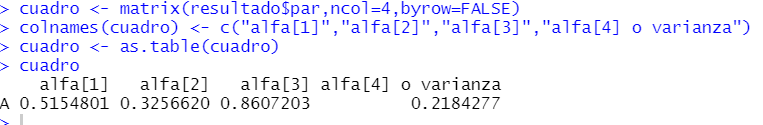

4. Se quiere conocer si la función de producción presenta rendimientos constantes, realice una prueba de Wald para determinarlo. ¿En qué consiste la prueba? ¿En qué caso es recomendable utilizar la prueba de Wald? ¿Cuál es su hipótesis nula? ¿Cuál es la hipótesis alternativa? ¿Se rechaza o no la hipótesis nula?

4.a Se realiza la prueba de Wald.

In [ ]:
R<-cbind(0,1,1,0) # Vector con coeficientes de la restricciÃ³n:  debe tener tamaÃ±o del vector de coeficientes
V<-solve(resultado$hessian) # Matriz de informaciÃ³n
prueba_wald<-wald.test(b = resultado$par,Sigma =V,L=R,H0=1)
prueba_wald$result

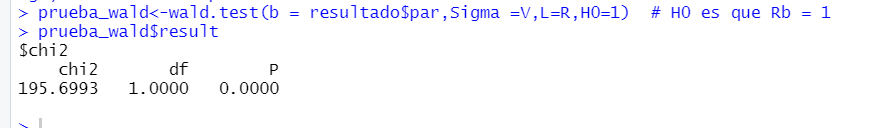

4.b La prueba consiste en testear la hipótesis nula de que un grupo o canasta de parámetros de la función (en este caso, de producción) sea igual a un valor o valores en específico.

4.c La prueba es recomendable cuando se desea estimar el modelo sin restricciones (Likelihood restringido), porque Wald no necesita imponer la restricción para obtener el estadístico y además, es recomendable cuando se desea realizar cálculos de hipótesis más sencillas o no muy complejas.

4.d La hipótesis nula es que alfa2+alfa3=1, donde alfa2 y alfa3 representan los coeficientes que acompañan a una función de producción Cobb Douglas.

4.e La hipótesis alternativa es que alfa2+alfa3 ≠ 1, donde alfa2 y alfa3 representan los coeficientes que acompañan a una función de producción Cobb Douglas.

4.f La hipótesis nula se rechaza con un 5% de significancia que afirma que la suma de los coeficientes son iguales a 1.

5. Realice una prueba de razón de verosimilitud. ¿En qué consiste la prueba? ¿En qué caso es recomendable utilizar la prueba de razón de verosimilitud? ¿Cuál es su hipótesis nula? ¿Cuál es la hipótesis alternativa? ¿Se rechaza o no la hipótesis nula?

5.a Se crea la función de verosimilitud restringida. 

In [ ]:
mv_fprod_restr<-function(alfa,Z1,Z2,Q) {
  
  n<-length(Z1)  #NÃºmero de observaciones
  e<-Q-alfa[1]*(Z1^alfa[2])*(Z2^(1-alfa[2]))   # Se impone restricciÃ³n de que exponentes sumen 1
  logl<- -0.5*n*log(2*pi)-0.5*n*log(alfa[4])-((t(e)%*%e)/(2*alfa[4])) # FunciÃ³n de verosimilitud normal evaluada en residuos
  return(-logl)  # FunciÃ³n da el negativo de la verosimilitud
}

5.b Se optmiza la función de verosimilitud restringida. 

In [ ]:
resultado_restr<-optim(c(1,0.5,0.5,0.01),mv_fprod_restr,method="BFGS",hessian=T,Z1=Insumo_1,Z2=Insumo_2,Q=Producto)

5.c Se deduce la razón de verosimilitud, se calcula el valor de su estadístico y del P-Value.

In [ ]:
LRestad<- 2*(resultado$value - resultado_restr$value)*-1
pvalueLR<-1-pchisq(LRestad,1)  # Pvalue de Ji2 con 1 gl que se usa para comparar la razón de verosimilitud.
LRestad
pvalueLR
valores_rv <- c(LRestad,pvalueLR)
valores_rv

5.d Se ordenan los datos en una tabla.

In [ ]:
cuadro2 <- matrix(valores_rv,ncol=2,byrow=FALSE)
colnames(cuadro2) <- c("Razon de verosimilitud","Pvalue")
rownames(cuadro2) <- c("")
cuadro2 <- as.table(cuadro2)
cuadro2

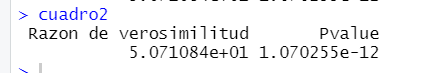

5.e La prueba consiste en la lógica de que si la restricción es válida, su imposición no debería conducir a una gran reducción en la función de probabilidad logarítmica, por tanto, se comparan los dos modelos (restringido y sin restricción) para buscar si existe una diferencia significativa en su ajuste y si se necesita o no remover variables predictivas. En el caso en que la diferencia es significativa se puede pensar que el modelo no restringido calza los datos mejor que el modelo restringido.

5.f Es recomendable cuando se desean hacer estimaciones más complejas, o de un mayor tamaño y se necesita imponer la restricción a los parámetros. Y cuando se tiene la información de la likelihood restringida como no restringida.

5.g La hipótesis nula es que la razón de verosimilitud sea igual a 1. 

5.h La hipótesis nula es que la razón de verosimilitud sea estrictamente menor a 1. 

5.i Se rechaza la hipótesis nula.

#**Segunda parte:** Truncamiento

1. Se pretende estudiar el comportamiento de la variable hours, que representa la cantidad de horas trabajadas, con respecto a distintas variables que forman parte de la base de datos. El método predilecto para trabajar son usualmente los Mínimos Cuadrados Ordinarios. Corra una regresión de MCO donde hours sea la variable dependiente. Tome los siguientes regresores: educación, experiencia, experiencia al cuadrado, edad, hijos menores a 6 años e hijos entre 6 y 18 años. Son en total seis variables independientes.

In [ ]:
Mroz <- load("C:/Users/David Mora Salazar/Documents/ECONOMÍA UNIVERSIDAD DE COSTA RICA/Microeconometría/Tarea 2/mroz.RData")
Modelo<- lm(formula=hours~educ+exper+expersq+age+kidslt6+kidsge6,data=data)
summary(Modelo)

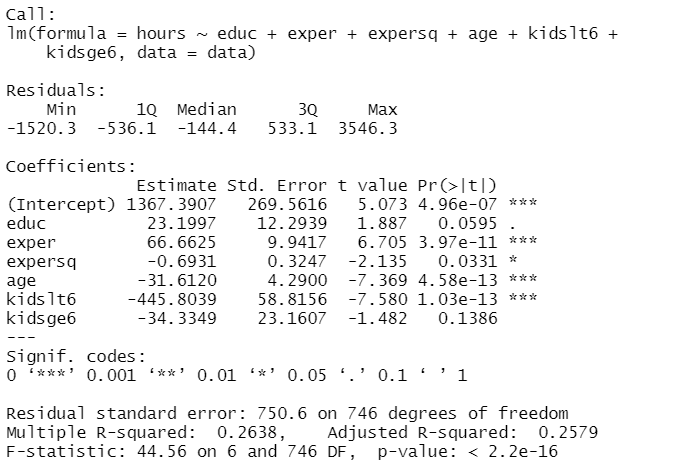

2. Con respecto a la regresión anterior, ¿Cuáles coeficientes son significativos?, ¿Cuáles son no significativos?, ¿Cómo se interpreta cada coeficiente?

Utilizando un nivel de significancia del 95%, los coeficientes de las variables: experiencia ,experiencia al cuadrado, edad, y el número de niños menores a 6 años, son significativos.
Mientras que los coeficientes de las variables: educación y el número de niños entre 18 y 6 años incluido, no son significativos.

La interpretación de los coeficientes significativos es que sí existe evidencia estadística de una relación entre las variables de esos coeficientes significativos y las horas trabajadas, es decir que cada variable es significativa para explicar las horas trabajadas.

La interpretación de los coeficientes no significativos es que no existe evidencia estadística de una relación entre las variables de esos coeficientes no significativos y las horas trabajadas, es decir que cada variable no es significativa para explicar las horas trabajadas.

Para cada coeficiente:
1. Educación: No existe evidencia estadística de una relación entre la educación y las horas trabajadas.
2. Experiencia: Si existe evidencia estadística de una relación entre la experiencia y las horas trabajadas. Por cada unidad adicional de experiencia, se puede esperar que las horas trabajadas aumenten un promedio de 66.6625.
3. Experiencia al cuadrado: Si existe evidencia estadística de una relación entre la experiencia al cuadrado y las horas trabajadas, un unidad adicional de experiencia se asocia en promedio a una disminución de 0.69 horas trabajadas. Por lo que refleja una curvatura de la variable experiencia.
4. Edad: Si existe evidencia estadística de una relación entre la edad y las horas trabajadas. Por cada unidad adicional de edad, se puede esperar que las horas trabajadas se reduzcan un promedio de 31.6120.
5. Número de niños menores de 6 años: Si existe evidencia estadística de una relación entre el número de niños menores de 6 años y las horas trabajadas. Por cada unidad adicional de niños menores de 6 años, se puede esperar que las horas trabajadas se reduzcan un promedio de 445.8039.
6. Número de niños entre 6 años y 18 años: No existe evidencia estadística de una relación entre el número de niños entre 6 años y 18 años, y las horas trabajadas.

3. La variable hours muestra un comportamiento peculiar. ¿Qué está pasando con ella? Investigue la variable, grafíquela en un histograma y comente lo que observa.

In [ ]:
#3.a Histograma de frecuencias
ggplot(data, aes(x=hours)) + geom_histogram( fill="#69b3a2", color="#e9ecef")+
  ggtitle("Histograma de frecuencia de hours")  +
  theme(
    plot.title = element_text(size=15)
  )
#3.b Histograma de densidad
ggplot(data=data,aes(hours))+geom_histogram(aes(y = ..density..),bins=3)+stat_function(fun = dnorm, args = list(mean = mean(data$hours), sd = sd(data$hours)))


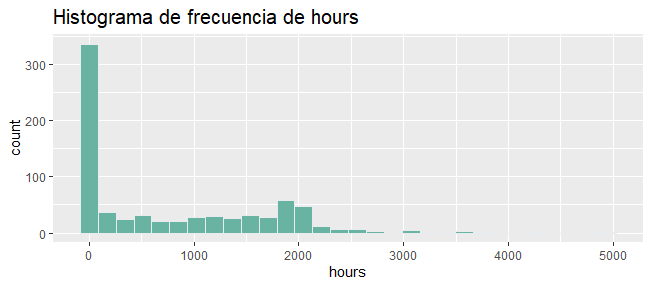

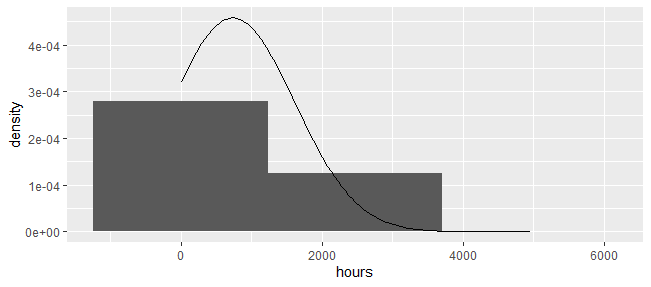

Se observa en el histograma de frecuencia que existe una importante cantidad de observaciones en donde la variable horas trabajadas es igual a cero. En el histograma de densidad, parece que la media se encuentra más cerca de ser menor a 1000 que mayor.

4. La variable hours está creando ruido en la base, esto significa que la gran cantidad de ceros que presenta distorsiona los datos. Realice otro histograma sin dichos ceros. ¿Qué cambios se observan en este nuevo grafico? ¿Es una buena idea trabajar sin este valor mínimo?

In [ ]:
data_trunc<- data %>% filter(`hours`>0)
ggplot(data_trunc, aes(x=hours)) + geom_histogram( fill="#69b3a2", color="#e9ecef") + 
  scale_x_continuous(breaks = seq(1, 5000, by = 1000))+ ggtitle("Histograma de frecuencia de hours truncado")  +
  theme(
    plot.title = element_text(size=15)
  )

#4.b Histograma de densidad
ggplot(data=data_trunc,aes(hours))+geom_histogram(aes(y = ..density..),bins=3)+stat_function(fun = dnorm, args = list(mean = mean(data_trunc$hours), sd = sd(data_trunc$hours)))

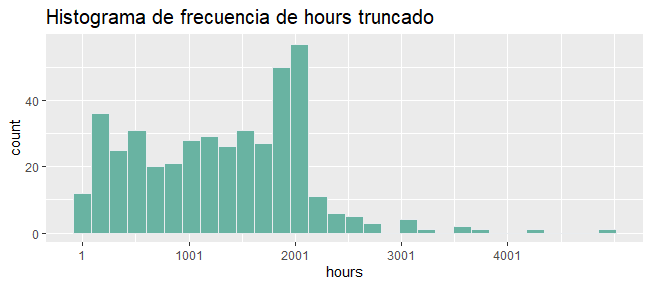

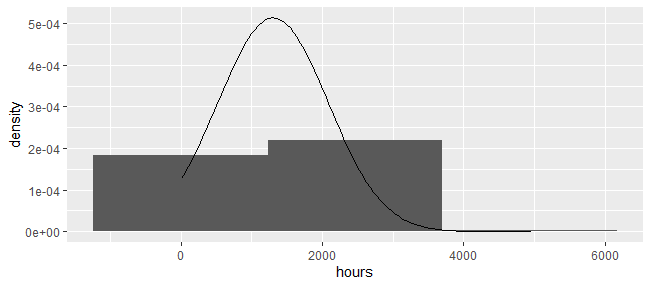

Con el nuevo histograma de densidad truncado por debajo en cero, parece ser que la media ahora aumenta o se acerca ahora más a las 2000 horas. Parece que la variabilidad también se reduce.

Creemos que si es una buena idea trabajar sin el valor mínimo de cero, pues para efectos de la investigación, se quiere que hayan valores positivos de "hours", pues deseamos ver a un subgrupo de la población que si tenga horas trabajadas para analizar los efectos de otras variables sobre esas horas trabajadas, claro está que se debe adaptar un modelo para datos truncados porque se debe reconocer que la muestra truncada no es una muestra aleatoria de la población.

5. Queda claro que trabajar mediante MCO no es la mejor idea. Según las características de la variable dependiente un truncamiento seria el mejor camino a tomar. Corra exactamente la misma regresión del punto 1, pero en esta aplique un truncamiento en hours >0.

In [ ]:
Modelo_trunc<-npsf::truncreg(formula=hours~educ+exper+expersq+age+kidslt6+kidsge6,data=data,ll=0, marg.eff=TRUE)

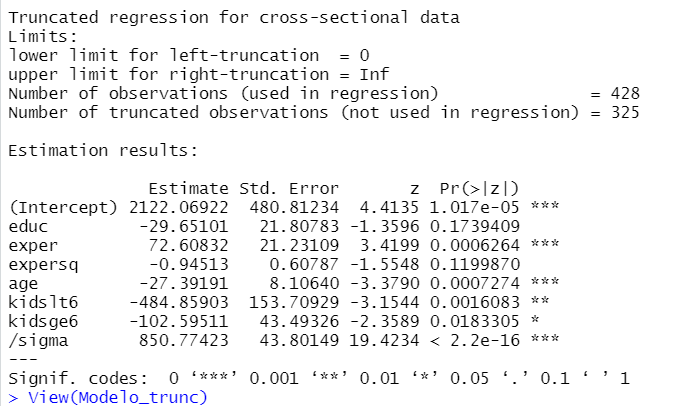

6. Con respecto a la regresión truncada del punto anterior, ¿Cuáles coeficientes son significativos?, ¿Cuáles son no significativos?, ¿Cambian los coeficientes o su significancia con respecto a la regresión MCO? ¿Por qué se podrían estar dando estos cambios? Comente ampliamente.

Utilizando un nivel de significancia del 95%, los coeficientes de las variables: experiencia, edad, el número de niños menores a 6 años y el número de niños entre 18 y 6 años incluido, son significativos. Mientras que los coeficientes de las variables: educación y experiencia al cuadrado no son significativos.

Tanto los valores de los coeficientes como sus niveles de significancia cambian. Para los valores de los coeficientes, todos cambian, unos con en mayor magnitud que otros, uno inclusive cambia de signo. A nivel de significancia, la variable de número de niños entre 6 años y 18 años pasa a ser significativa y la experiencia al cuadrado pasa a ser no significativa para una significancia de 95%.

Estos cambios se podrían estar dando porque ya no se está usando un modelo de regresión lineal, sino un modelo que se ajuste a los efectos del truncamiento. Recuerde que el modelo MCO es el proceso de estimación más eficiente solo cuando se observa una muestra aleatoria de la población. (Wooldridge(2010)), cuando se incumple el supuesto de que se tiene una muestra aleatoria de n observaciones que sigue el modelo poblacional debido al truncamiento por lo general produce estimadores insesgados hacia cero, según Hausman y Wise (1977). 

También ocurre que el indicador de selección cuando un truncamiento proviene de arriba, y los errores estarán correlacionados, incluso de manera condicional sobre la variable independiente (x). Esta es la razón de que MCO sobre la muestra seleccionada no estime de forma consistente los coeficientes. Por los motivos antes expuestos se requiere realizar la regresión tomando en cuenta el término no linear Lambda, de manera que no se generen sesgos por tener una variable lambda omitida.

Además, cuando se tienen datos truncados, se realiza la estimación de máxima verosimilitud, que resulta en un conjunto de coeficientes estimados que maximiza la densidad, por tanto, el método matemático difiere de un modelo lineal MCO. Por tanto, es claro que los coeficientes varían de un modelo a otro.

7. En este caso, como se pretende el análisis de una subpoblación, nos interesan los efectos marginales y no los coeficientes de la regresión truncada. Interprete los coeficientes marginales en la media.

In [ ]:
#Efectos marginales: sobre la media
#Primero se saca la media de las variables:
mean_educ <- mean(data_trunc$educ)
mean_exper <- mean(data_trunc$exper)
mean_expersq <- mean(data_trunc$expersq)
mean_age <- mean(data_trunc$age)
mean_kidslt6 <- mean(data_trunc$kidslt6)
mean_kidsge6 <- mean(data_trunc$kidsge6)
#Multiplicamos la media de la variable por el coeficiente:
medias <- list("mean_c" = 1, "mean_educ" = mean_educ, "mean_exper" = mean_exper, "mean_expersq" = mean_expersq, "mean_age" = mean_age, "mean_kidslt6" = mean_kidslt6, "mean_kidsge6" = mean_kidsge6)
coeficientes <- list("c" = 2122.06922,"coef_educ" = -29.65101, "coef_exper" = 72.60832, "coef_expersq" = -0.94513, "coef_age" = -27.39191, "coef_kidslt6" = -484.85903, "coef_kidsge6" = -102.59511)
mediasxcoeficientes <- list(unlist(medias)*unlist(coeficientes))
suma_mediasxcoeficientes <- 1115.281
sigma <- 850.77423
#Se saca el alpha:
alpha <- (-1115.281)/850.77423
#Se saca phi minúscula y phi de alpha de la tabla normal:
phi_min_alpha <- dnorm(alpha, mean = 0, sd=1)
phi_alpha  <- pnorm(alpha, mean = 0, sd=1)
#Se saca Lambda:
Lambda <- phi_min_alpha/(1-phi_alpha)
#Se saca delta:
delta <- Lambda*(Lambda-alpha)
uno_menos_delta <- 1-delta
#Se sacan los efectos marginales sobre la media
eff_marg_media <- lapply(coeficientes, "*",uno_menos_delta)

Los efectos marginales en la media se interpretan como:
1. Educación: Con respecto a educación, el efecto marginal de un año de educación se observa como un cambio de -21.36208 en la media del número de horas del trabajadas individuo promedio.  
2. Experiencia: Con respecto a experiencia, el efecto marginal de una unidad de experiencia se observa como un cambio de 52.31063 en la media del número de horas trabajadas del individuo promedio.
3. Experiencia al cuadrado: Con respecto a experiencia al cuadrado, el efecto marginal de una unidad de experiencia al cuadrado se observa como un cambio de -.6809173 en la media del número de horas trabajadas del individuo promedio.
4. Edad: Con respecto a la edad, el efecto marginal de un año más de edad se observa como un cambio de -19.73451 en la media del número de horas trabajadas del individuo promedio.
5. Número de hijos menores de 6 años: Con respecto al número de hijos menores de 6 años, el efecto marginal de un niño más menor a 6 años se observa como un cambio de -349.3163 en la media del número de horas trabajadas del individuo promedio.  
6. Número de hijos de entre 6 años y 18 años: Con respecto al número de hijos de entre 6 años y 18 años, el efecto marginal de un niño más de entre 6 años y 18 años se observa como un cambio de -73.91465 en la media del número de horas trabajadas del individuo promedio.  

8. No hay que dejar de lados los efectos marginales promedios, interprételos también.

In [ ]:
#En R
summary(Modelo_trunc$marg.effects)

Los efectos marginales promedios se interpretan como:
 es el cambio promedio en la media del numero de infidelidades calculado para la muestra
1. Educación: Con respecto a educación, el efecto marginal de un año de educación se observa como un cambio promedio de -21.14343 en la media del numero de horas del trabajadas calculado para la muestra.  
2. Experiencia: Con respecto a experiencia, el efecto marginal de una unidad de experiencia se observa como un cambio promedio de 51.7752 en la media del número de horas trabajadas calculado para la muestra.
3. Experiencia al cuadrado: Con respecto a experiencia al cuadrado, el efecto marginal de una unidad de experiencia al cuadrado se observa como un cambio promedio de -.6739477 en la media del número de horas trabajadas calculado para la muestra.
4. Edad: Con respecto a la edad, el efecto marginal de un año más de edad se observa como un cambio promedio de -19.53251 en la media del número de horas trabajadas calculado para la muestra.
5. Número de hijos menores de 6 años: Con respecto al número de hijos menores de 6 años, el efecto marginal de un niño más menor a 6 años se observa como un cambio promedio de -345.7408 en la media del número de horas trabajadas calculado para la muestra.  
6. Número de hijos de entre 6 años y 18 años: Con respecto al número de hijos de entre 6 años y 18 años, el efecto marginal de un niño más de entre 6 años y 18 años se observa como un cambio promedio de -73.15809 en la media del número de horas trabajadas calculado para la muestra.